https://www.kaggle.com/code/fatmakursun/bike-sharing-feature-engineering

# Bike Sharing
On this notebook, we will try to predict number of total rental using machine learning algorithms. Before this one, we will do feature engineering and exploratory data analysis for examine the data.

## 1.1 Let's explore the data.

- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [24]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [25]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [26]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [27]:
print(train.isnull().sum().sort_values(ascending=False))
print('**'*50)
print(test.isnull().sum().sort_values(ascending=False))

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
****************************************************************************************************
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [28]:
print(train.info()) # we can see type of features with this info()
print('**'*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  

As we can see, datetime's type is object. We should convert it to datetime.

In [29]:
train.datetime = pd.to_datetime(train.datetime)
test.datetime = pd.to_datetime(test.datetime)

In [30]:
print(train.info())
print('**'*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Ran

Yes! we converted it. Now, we will separate the datetime column as year,month,day,hour and week

In [33]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.day_name()

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.day_name()

In [34]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,Wednesday


We did it too. Now we can start to data exploratory. Let's start !

In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


# 2. EDA & Feature Engineering

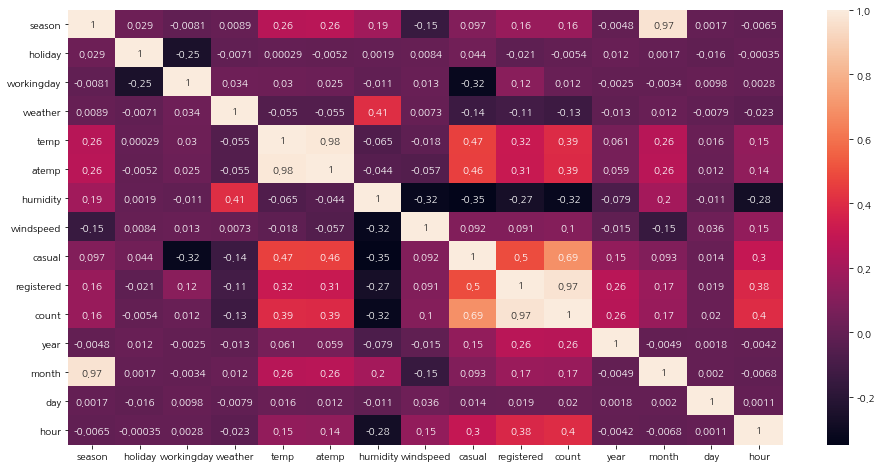

In [37]:
plt.figure(figsize=(16, 8))
sns.heatmap(train.corr(), annot=True)
plt.show()

<Figure size 1152x576 with 0 Axes>

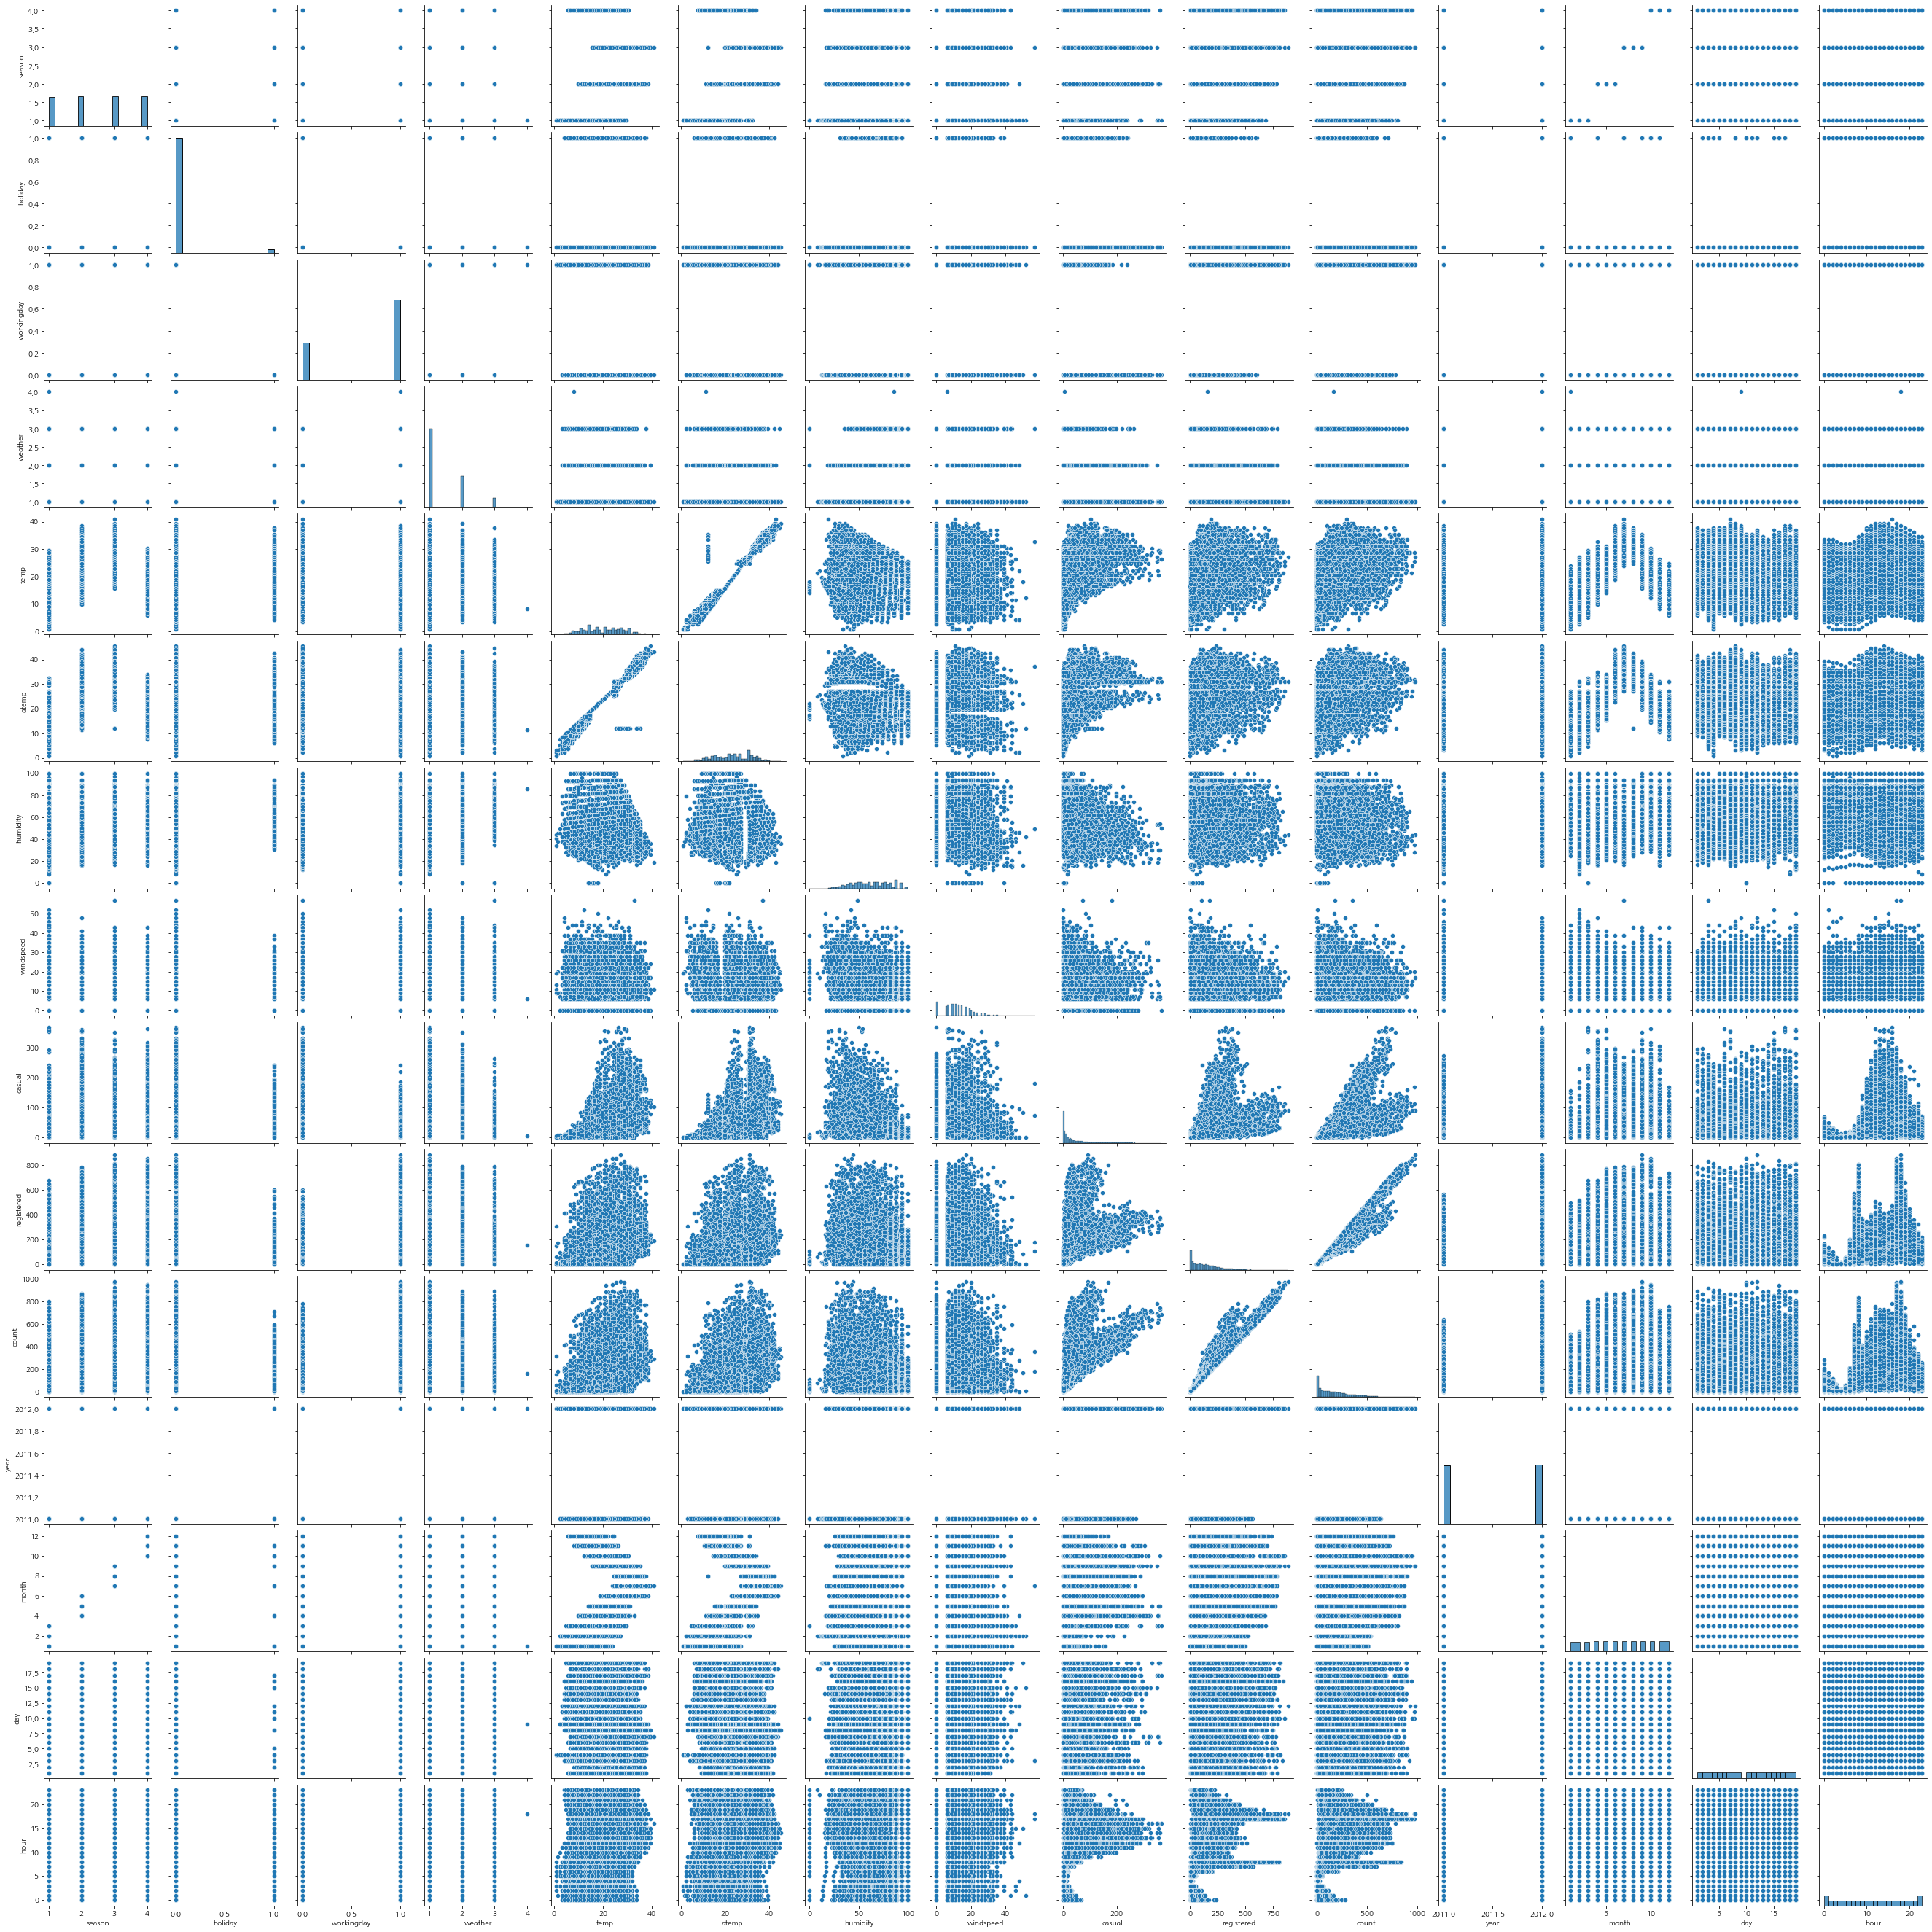

In [38]:
plt.figure(figsize=(16, 8))
sns.pairplot(train)
plt.show()

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


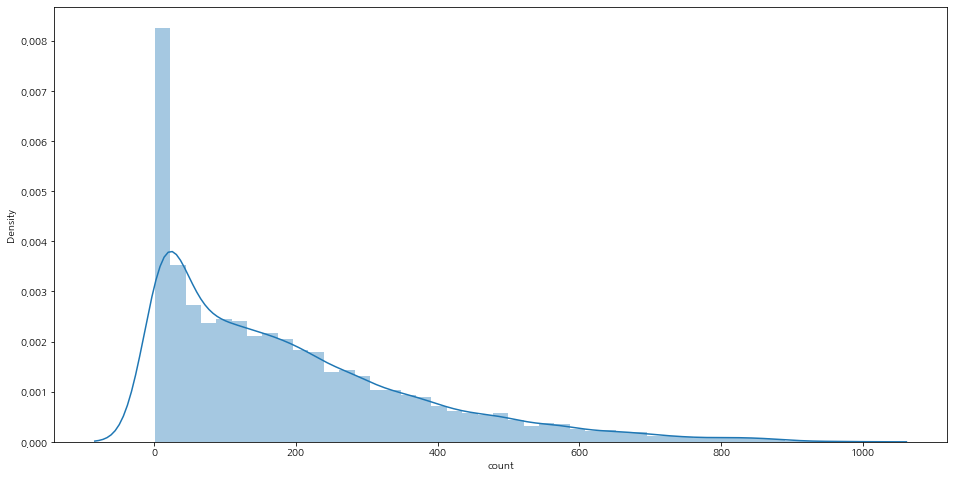

In [39]:
plt.figure(figsize=(16,8))
sns.distplot(train['count'])
plt.show()

In [42]:
def scatter_plot():
    for i in test.columns:
        plt.scatter(train[i],train['count'])
        plt.title(f"Scatter plot for {i}")
        plt.show()

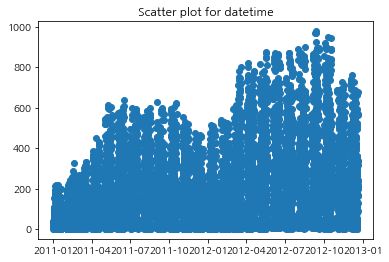

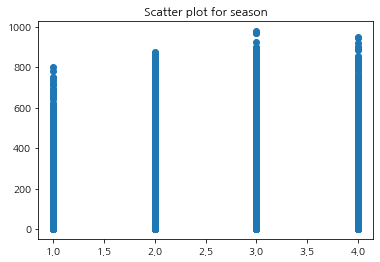

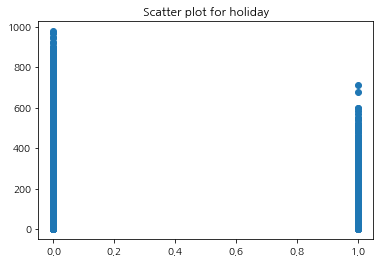

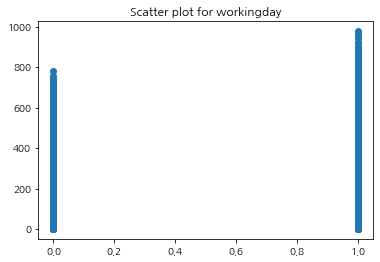

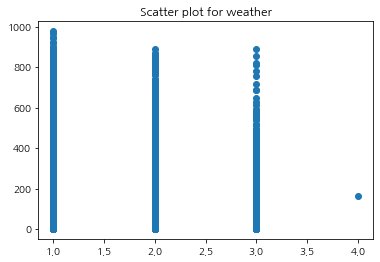

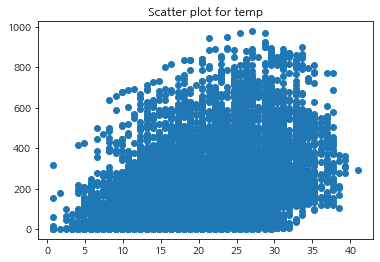

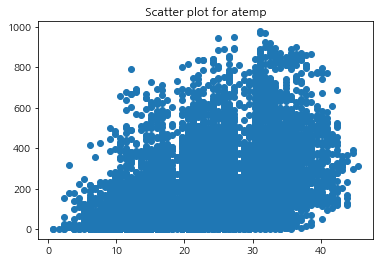

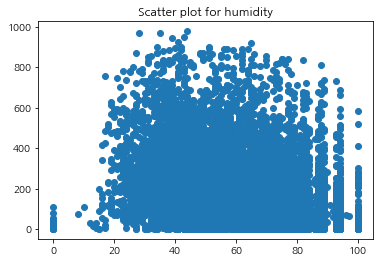

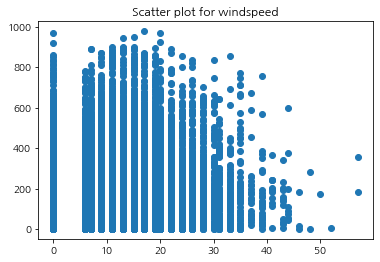

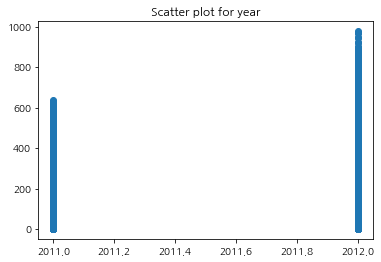

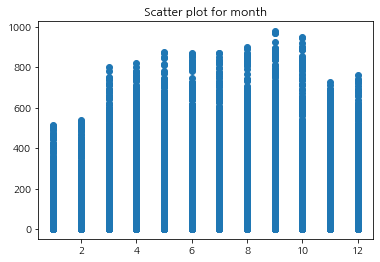

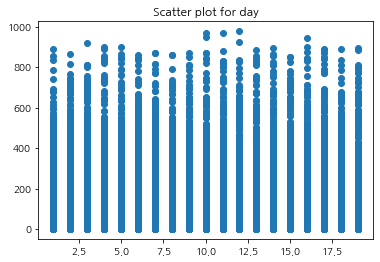

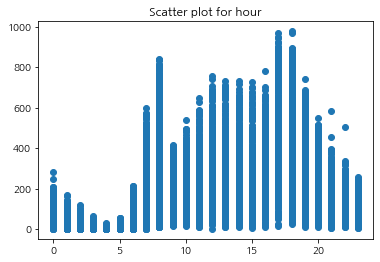

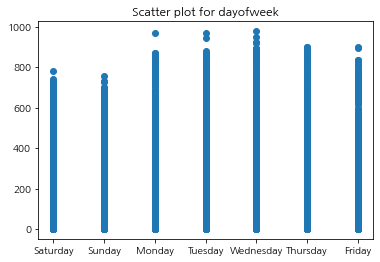

In [43]:
scatter_plot()

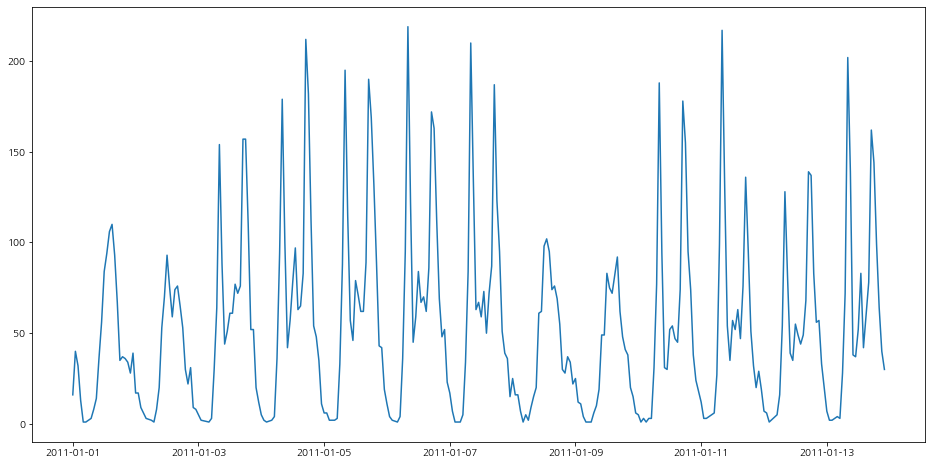

In [44]:
plt.figure(figsize=(16,8))
plt.plot(train.set_index('datetime')['count'][0:300])
plt.show()

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

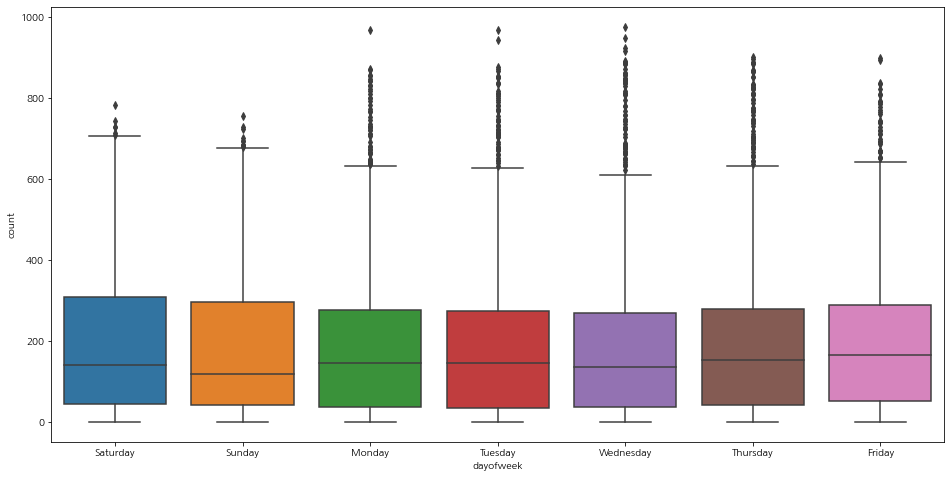

In [45]:
plt.figure(figsize=(16,8))
sns.boxplot(x='dayofweek', y='count', data=train)

In [46]:
# we need to convert categorical data to numeric data.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['dayofweek'] = le.fit_transform(train['dayofweek'])
test['dayofweek'] = le.fit_transform(test['dayofweek'])

As we can see from above graph. This is positively(right) skewed data.Now we will look the box plot and outliers value.

Box plot use the IQR method for finding display data and outliers.

**Wikipedia Definition**

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1. In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

- We will clear the outliers values

<AxesSubplot:xlabel='season', ylabel='count'>

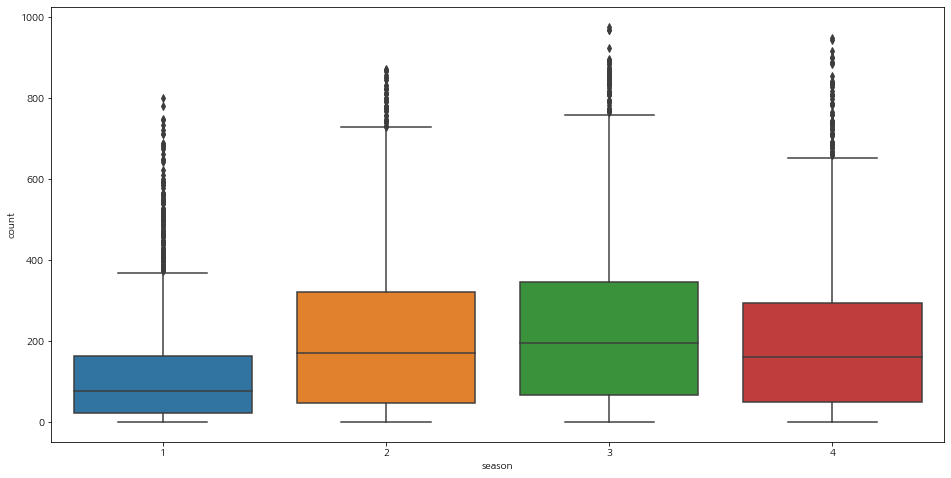

In [48]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='season', y='count', data=train)

we can say of seein this graph, people more rent bike on summer and fall.

<AxesSubplot:xlabel='hour', ylabel='count'>

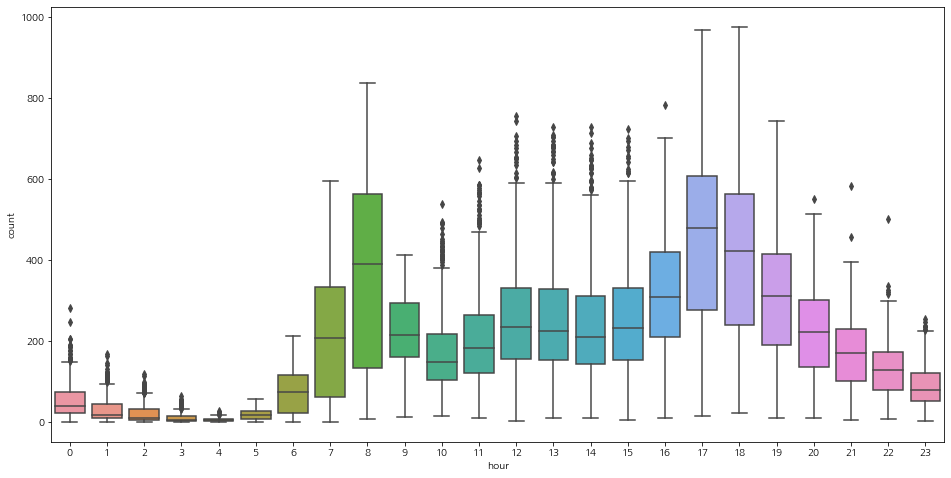

In [49]:
plt.figure(figsize=(16,8))
sns.boxplot(x='hour', y='count', data=train)

<AxesSubplot:xlabel='year', ylabel='count'>

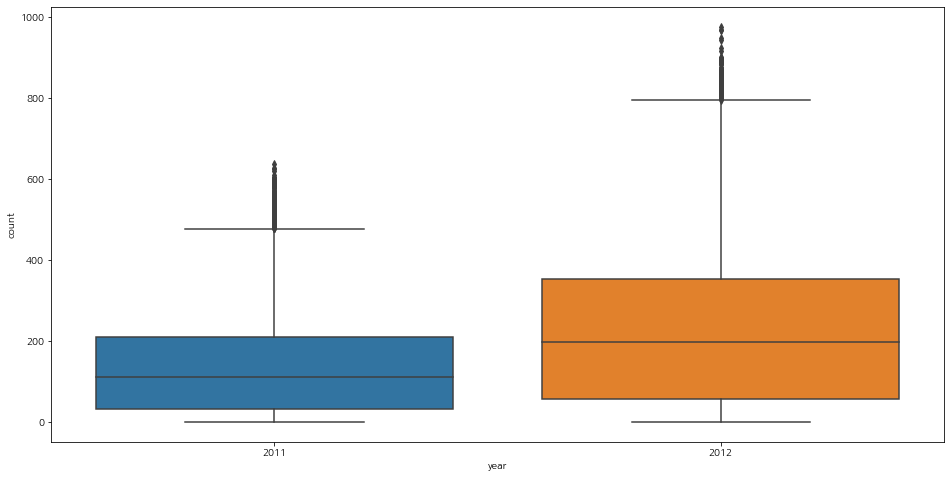

In [50]:
plt.figure(figsize=(16,8))
sns.boxplot(x='year', y='count', data=train)

We can say that people prefer the morning and evening times for renting bike

(array([1767.,  939.,  975.,  627.,  394.,  328.,  214.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

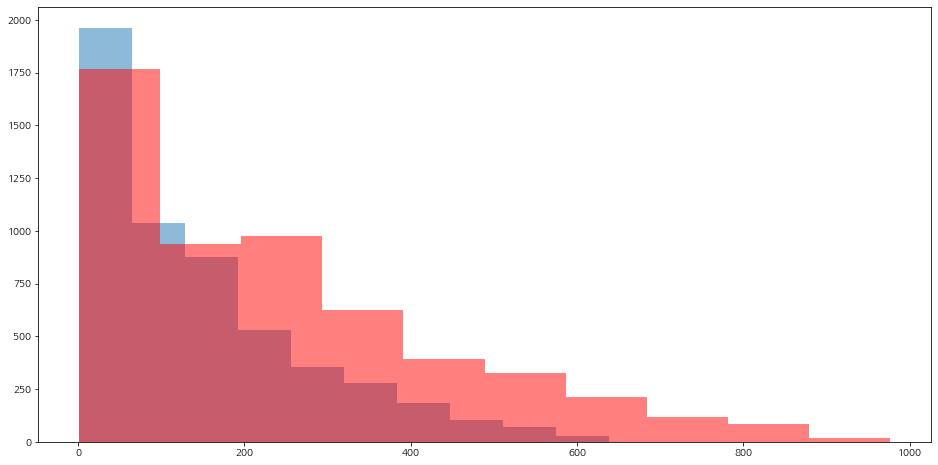

In [51]:
plt.figure(figsize=(16,8))
plt.hist(train['count'][train['year'] == 2011], alpha=0.5, label='2011')
plt.hist(train['count'][train['year'] == 2012], alpha=0.5, label='2012', color='red')

Rented more bike in 2012 than 2011.

Now, let's find the outliers

In [52]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,2


In [53]:
train.set_index('datetime', inplace=True)

In [54]:
train['2011-01-19 23:00:00':]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-19 23:00:00,1,0,1,1,12.30,13.635,52,31.0009,1,27,28,2011,1,19,23,6
2011-02-01 00:00:00,1,0,1,2,6.56,9.090,64,7.0015,2,6,8,2011,2,1,0,5
2011-02-01 01:00:00,1,0,1,2,6.56,9.090,69,7.0015,0,3,3,2011,2,1,1,5
2011-02-01 02:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,2,5
2011-02-01 03:00:00,1,0,1,2,6.56,11.365,69,0.0000,0,2,2,2011,2,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,6
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,6
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,6


In [55]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
year            1.0000
month           6.0000
day            10.0000
hour           12.0000
dayofweek       4.0000
dtype: float64


In [56]:
train_without_outliers = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
train_without_outliers.dropna(inplace=True)

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
print(train.info())
print('*********************************************************************************')
print(train_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
 15  dayofweek   10886 non-null  int32  
dtypes: float64(3), int32(1), int64(12)
memory usage: 1.6 MB
None
****************************************************

In [59]:
train_without_outliers.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,2
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,2


We are going to fill the row that wind speed is equal zero.

<AxesSubplot:xlabel='season', ylabel='windspeed'>

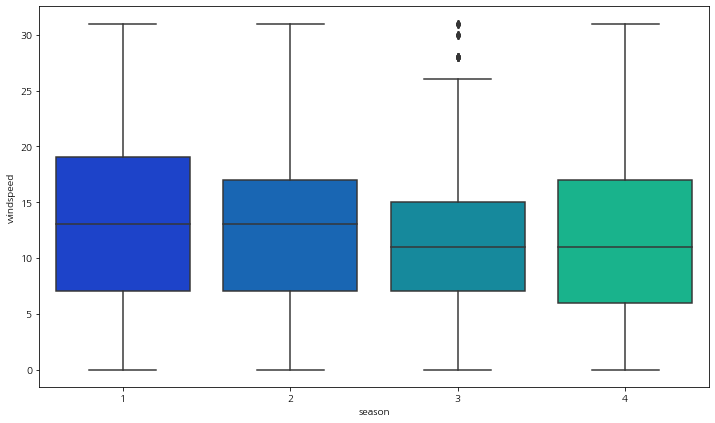

In [60]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='season', y='windspeed', data=train_without_outliers, palette='winter')

In [61]:
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].replace(0, np.NaN)
test['windspeed'] = test['windspeed'].replace(0, np.NaN)

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Now, We repalced zero as NaN. We will fill NaN with interpolate. Interpolate is using fill NaN value for time series data.

In [63]:
train_without_outliers['windspeed'].fillna(method='bfill',inplace=True)
train_without_outliers['windspeed'] = train_without_outliers['windspeed'].interpolate()
test['windspeed'] = test['windspeed'].interpolate()

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [64]:
train_without_outliers['windspeed'].isnull().sum()

0

In [65]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,21.002267,2011,1,20,1,4
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,16.001833,2011,1,20,2,4
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4


In [66]:
train_without_outliers.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0032,3,13,16,2011,1,1,0,2
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0032,8,32,40,2011,1,1,1,2
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0032,5,27,32,2011,1,1,2,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0032,3,10,13,2011,1,1,3,2
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0032,0,1,1,2011,1,1,4,2


Now e are going to convert cateforical data to categorical columns.

In [67]:
train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = train_without_outliers[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')


test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']] = test[['season','holiday','workingday','weather', 'year','month','day','hour','dayofweek']].astype('category')

C:\Users\gram_\anaconda3\envs\min\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [68]:
train_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9263 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      9263 non-null   category
 1   holiday     9263 non-null   category
 2   workingday  9263 non-null   category
 3   weather     9263 non-null   category
 4   temp        9263 non-null   float64 
 5   atemp       9263 non-null   float64 
 6   humidity    9263 non-null   int64   
 7   windspeed   9263 non-null   float64 
 8   casual      9263 non-null   int64   
 9   registered  9263 non-null   int64   
 10  count       9263 non-null   int64   
 11  year        9263 non-null   category
 12  month       9263 non-null   category
 13  day         9263 non-null   category
 14  hour        9263 non-null   category
 15  dayofweek   9263 non-null   category
dtypes: category(9), float64(3), int64(4)
memory usage: 663.2 KB


Now, we can start to make predictions

# 3. Random Forest Regression¶
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

## 3.1 Train test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = train_without_outliers[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']]
y = train_without_outliers['count']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [72]:
y_train

datetime
2012-12-05 16:00:00    377
2011-07-09 00:00:00    121
2011-07-02 05:00:00     14
2011-12-14 19:00:00    268
2012-08-18 21:00:00    338
                      ... 
2011-07-10 09:00:00    169
2012-06-02 00:00:00     86
2011-12-17 15:00:00    228
2012-12-12 10:00:00    136
2012-08-16 05:00:00     37
Name: count, Length: 8336, dtype: int64

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
rf_prediction = rf.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

RMSE: 30.995788545401464


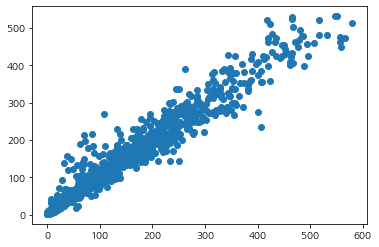

In [77]:
plt.scatter(y_test, rf_prediction)

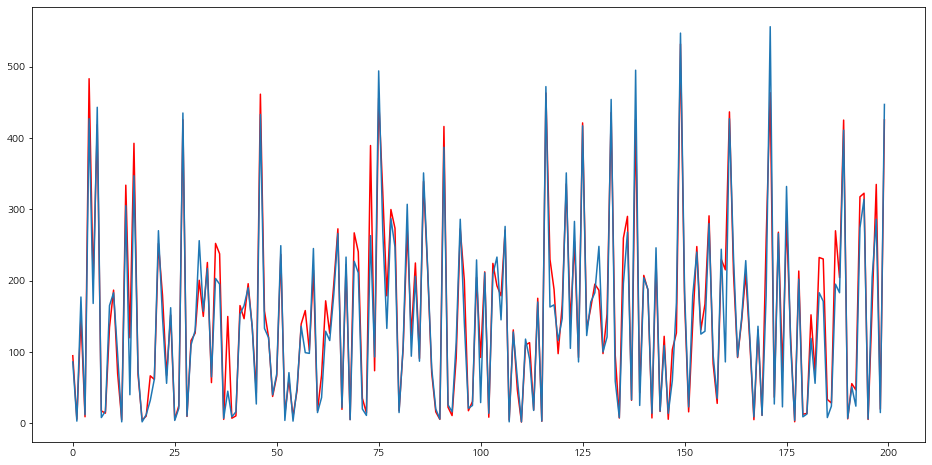

In [78]:
plt.figure(figsize=(16,8))
plt.plot(rf_prediction[0:200],'r')
plt.plot(y_test[0:200].values)

# 4. Decision Tree Regression
The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [80]:
dt_prediction = dt_reg.predict(X_test)

In [81]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_prediction)))

RMSE: 45.83753731823096


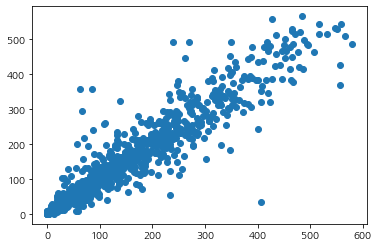

In [82]:
plt.scatter(y_test,dt_prediction)

In [83]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,2011,1,20,0,4
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,21.002267,2011,1,20,1,4
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,16.001833,2011,1,20,2,4
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,3,4
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,2011,1,20,4,4


In [84]:
test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']] = sc_X.fit_transform(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']])

In [85]:
test_pred= rf.predict(test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour', 'dayofweek','windspeed']])

In [86]:
test_pred

array([  8.  ,   3.56,   4.25, ..., 169.17, 124.92,  92.01])

In [87]:
test_pred=test_pred.reshape(-1,1)

In [89]:
test_pred = pd.DataFrame(test_pred, columns=['count'])

In [90]:
df = pd.concat([test['datetime'], test_pred],axis=1)

In [91]:
df.head()

,datetime,count
0,2011-01-20 00:00:00,8.00
1,2011-01-20 01:00:00,3.56
2,2011-01-20 02:00:00,4.25
3,2011-01-20 03:00:00,3.33
4,2011-01-20 04:00:00,2.88


In [92]:
df['count'] = df['count'].astype('int')

In [ ]:
df.to_csv('submission1.csv' , index=False)